In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("House_Prices_Modified.csv")

# Separate the target variable "price" from the features
X = df.drop(columns=['price'])  # Features
y = df['price']  # Target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Combine the standardized features with the target variable
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled['price'] = y  # Add the target variable back

# Save the standardized dataset to a new CSV file
df_scaled.to_csv("House_Prices_Standardized.csv", index=False)


In [14]:
df = pd.read_csv("House_Prices_Standardized.csv")
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.734708,-0.658681,-0.544898,1.870152,-0.352572,-0.306079,-0.943355,-0.260715,221900.0
1,-0.398737,0.175607,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,0.460841,0.245141,-0.681079,0.879568,1.161568,-0.746341,-0.432686,-0.187868,538000.0
2,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,-1.229834,-0.658681,-1.293892,-0.933388,1.283537,-0.135655,1.070140,-0.172375,180000.0
3,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.558836,-0.891699,1.397515,-0.204446,1.085160,-0.283288,-1.271816,-0.914174,-0.284522,604000.0
4,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,0.291916,-0.130895,-0.658681,0.544548,-0.073636,0.409550,1.199335,-0.272190,-0.192849,510000.0


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the standardized dataset
df = pd.read_csv("House_Prices_Standardized.csv")

# Separate the features (X) and the target variable (y)
X = df.drop(columns=['price'])  # Features
y = df['price']  # Target variable

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Optional: Save the training and testing sets to CSV files
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)
train_df.to_csv("train_data.csv", index=False)
test_df.to_csv("test_data.csv", index=False)


In [16]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the training and testing datasets
train_data = pd.read_csv("train_data.csv")
test_data = pd.read_csv("test_data.csv")

# Separate features (X) and target variable (y) for training and testing sets
X_train = train_data.drop(columns=['price'])
y_train = train_data['price']
X_test = test_data.drop(columns=['price'])
y_test = test_data['price']

# Initialize regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[name] = {
        "MAE": mae,
        "MSE": mse,
        "R-squared": r2
    }

# Print results
print("Algorithm\t\tMAE\t\tMSE\t\tR-squared")
print("="*50)
for name, metrics in results.items():
    print(f"{name}\t\t{metrics['MAE']:.2f}\t\t{metrics['MSE']:.2f}\t\t{metrics['R-squared']:.2f}")

# Summary
print("="*50)
print("Summary:")
for name, metrics in results.items():
    print(f"{name}:")
    print(f"\tMean Absolute Error: {metrics['MAE']:.2f}")
    print(f"\tMean Squared Error: {metrics['MSE']:.2f}")
    print(f"\tR-squared: {metrics['R-squared']:.2f}")
    print("-"*30)


Algorithm		MAE		MSE		R-squared
Linear Regression		127630.43		43413626657.00		0.70
Ridge Regression		127628.16		43413792577.37		0.70
Lasso Regression		127630.56		43413760727.44		0.70
Summary:
Linear Regression:
	Mean Absolute Error: 127630.43
	Mean Squared Error: 43413626657.00
	R-squared: 0.70
------------------------------
Ridge Regression:
	Mean Absolute Error: 127628.16
	Mean Squared Error: 43413792577.37
	R-squared: 0.70
------------------------------
Lasso Regression:
	Mean Absolute Error: 127630.56
	Mean Squared Error: 43413760727.44
	R-squared: 0.70
------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.747e+13, tolerance: 1.977e+11
  model = cd_fast.enet_coordinate_descent(


In [23]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import numpy as np

# Define the regression algorithms
linear_regression = LinearRegression()
ridge_regression = Ridge()
lasso_regression = Lasso()

# Define the evaluation metrics
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']

# Perform cross-validation for Linear Regression
linear_regression_cv_results = cross_validate(linear_regression, X_train, y_train, cv=5, scoring=scoring)

# Perform cross-validation for Ridge Regression
ridge_regression_cv_results = cross_validate(ridge_regression, X_train, y_train, cv=5, scoring=scoring)

# Perform cross-validation for Lasso Regression
lasso_regression_cv_results = cross_validate(lasso_regression, X_train, y_train, cv=5, scoring=scoring)

# Calculate mean and standard deviation for each metric
linear_regression_scores = linear_regression_cv_results['test_neg_mean_absolute_error'], linear_regression_cv_results['test_neg_mean_squared_error'], linear_regression_cv_results['test_r2']
linear_regression_mean = [np.mean(score) for score in linear_regression_scores]
linear_regression_std = [np.std(score) for score in linear_regression_scores]

ridge_regression_scores = ridge_regression_cv_results['test_neg_mean_absolute_error'], ridge_regression_cv_results['test_neg_mean_squared_error'], ridge_regression_cv_results['test_r2']
ridge_regression_mean = [np.mean(score) for score in ridge_regression_scores]
ridge_regression_std = [np.std(score) for score in ridge_regression_scores]

lasso_regression_scores = lasso_regression_cv_results['test_neg_mean_absolute_error'], lasso_regression_cv_results['test_neg_mean_squared_error'], lasso_regression_cv_results['test_r2']
lasso_regression_mean = [np.mean(score) for score in lasso_regression_scores]
lasso_regression_std = [np.std(score) for score in lasso_regression_scores]

# Print the results
print("Results for Linear Regression:")
for metric, mean, std in zip(scoring, linear_regression_mean, linear_regression_std):
    print(f"{metric}: {mean:.2f} (+/- {std:.2f})")
print()

print("Results for Ridge Regression:")
for metric, mean, std in zip(scoring, ridge_regression_mean, ridge_regression_std):
    print(f"{metric}: {mean:.2f} (+/- {std:.2f})")
print()

print("Results for Lasso Regression:")
for metric, mean, std in zip(scoring, lasso_regression_mean, lasso_regression_std):
    print(f"{metric}: {mean:.2f} (+/- {std:.2f})")
print()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.320e+13, tolerance: 1.528e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.369e+13, tolerance: 1.559e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.454e+13, tolerance: 1.584e

Results for Linear Regression:
neg_mean_absolute_error: -125059.42 (+/- 514.95)
neg_mean_squared_error: -39573030421.95 (+/- 4785482419.71)
r2: 0.70 (+/- 0.01)

Results for Ridge Regression:
neg_mean_absolute_error: -125056.23 (+/- 514.92)
neg_mean_squared_error: -39572986225.65 (+/- 4785743850.16)
r2: 0.70 (+/- 0.01)

Results for Lasso Regression:
neg_mean_absolute_error: -125059.37 (+/- 514.96)
neg_mean_squared_error: -39573027640.68 (+/- 4785397865.75)
r2: 0.70 (+/- 0.01)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.436e+13, tolerance: 1.640e+11
  model = cd_fast.enet_coordinate_descent(


In [24]:
from sklearn.linear_model import LinearRegression

# Assuming X_train and y_train are your training features and target variable respectively
# Fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get the coefficients
coefficients = model.coef_
print("Coefficients:", coefficients)

# Get the intercept
intercept = model.intercept_
print("Intercept:", intercept)


Coefficients: [-32260.38714871  32989.72340545  83105.99832004   4029.30799642
   3581.64453266  47545.05685123  42489.39358804  13531.76465891
 112070.67331801  77598.09941777  27271.44658501 -80298.9876787
 -30088.86140082  82145.85854711 -27382.63081926  10441.39685728
  -8828.69733048]
Intercept: 539638.9543178442


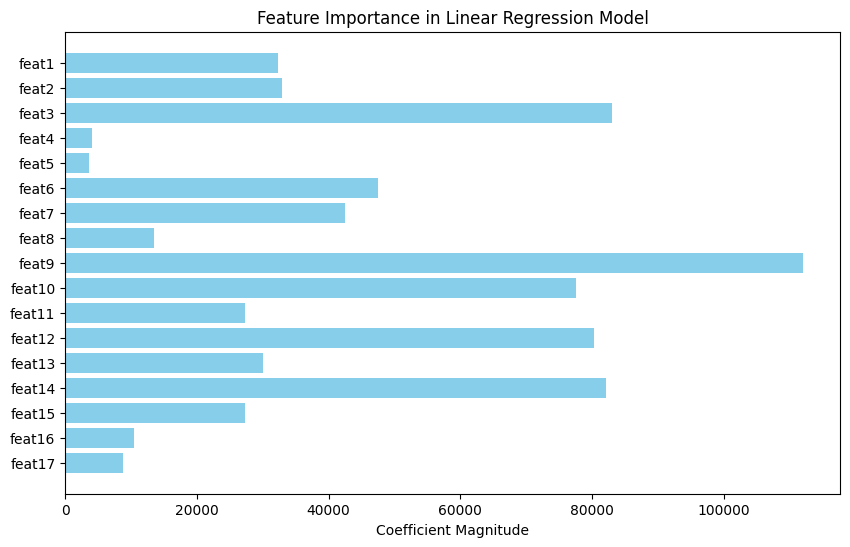

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Coefficients obtained from your Linear Regression model
coefficients = [-32260.38714871, 32989.72340545, 83105.99832004, 4029.30799642,
                3581.64453266, 47545.05685123, 42489.39358804, 13531.76465891,
                112070.67331801, 77598.09941777, 27271.44658501, -80298.9876787,
                -30088.86140082, 82145.85854711, -27382.63081926, 10441.39685728,
                -8828.69733048]
feature_names = ['feat1', 'feat2', 'feat3', 'feat4', 'feat5', 'feat6', 'feat7',
                 'feat8', 'feat9', 'feat10', 'feat11', 'feat12', 'feat13', 'feat14',
                 'feat15', 'feat16', 'feat17']

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(feature_names, np.abs(coefficients), color='skyblue')
plt.xlabel('Coefficient Magnitude')
plt.title('Feature Importance in Linear Regression Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()


In [26]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import joblib

# Load the standardized dataset
df = pd.read_csv("House_Prices_Standardized.csv")

# Separate features (X) and target variable (y)
X = df.drop(columns=['price'])  # Features
y = df['price']  # Target variable

# Train the model with the best parameters
model = LinearRegression()
model.fit(X, y)

# Save the trained model to disk
joblib.dump(model, 'linear_regression_model.pkl')

print("Model trained and saved successfully!")


Model trained and saved successfully!


In [28]:
import joblib

# Load the trained model from disk
model = joblib.load('linear_regression_model.pkl')

# Get input data from the user
input_data = []
for i in range(1, 18):
    value = float(input(f"Enter value for feature {i}: "))
    input_data.append(value)

# Make predictions
predicted_price = model.predict([input_data])

print(f"Predicted price: ${predicted_price[0]:,.2f}")


Enter value for feature 1: 23
Enter value for feature 2: 2
Enter value for feature 3: 67
Enter value for feature 4: 4
Enter value for feature 5: 32
Enter value for feature 6: 98
Enter value for feature 7: 56
Enter value for feature 8: 44
Enter value for feature 9: 34
Enter value for feature 10: 2
Enter value for feature 11: 89
Enter value for feature 12: 54
Enter value for feature 13: 3
Enter value for feature 14: 2
Enter value for feature 15: 6
Enter value for feature 16: 77
Enter value for feature 17: 6
Predicted price: $16,415,797.52


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
